<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**
3. **[Linear Discriminant Analysis (LDA)](#lda)**

**Import the required libraries**

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [3]:
df = pd.read_csv('Ind_Climate_RainPred.csv')
df.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No



### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# write your code here
df.dtypes

Temperature_min        float64
Temperature_max        float64
WindSpeedAt3am           int64
WindSpeedAt10am          int64
WindSpeedAt6pm           int64
HumidityLevelAt10am      int64
HumidityAt6pm            int64
PressureAt10am         float64
PressureAt6pm          float64
TemperatureAt10am      float64
TemperatureAt6pm       float64
WillRainTomorrow?       object
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# write your code here
df['WillRainTomorrow?'].value_counts()

No     5464
Yes    5000
Name: WillRainTomorrow?, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df.isnull().sum()
#There are no null values.

Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df_ind=df.drop('WillRainTomorrow?', axis=1)

In [9]:
df_ind.columns

Index(['Temperature_min', 'Temperature_max', 'WindSpeedAt3am',
       'WindSpeedAt10am', 'WindSpeedAt6pm', 'HumidityLevelAt10am',
       'HumidityAt6pm', 'PressureAt10am', 'PressureAt6pm', 'TemperatureAt10am',
       'TemperatureAt6pm'],
      dtype='object')

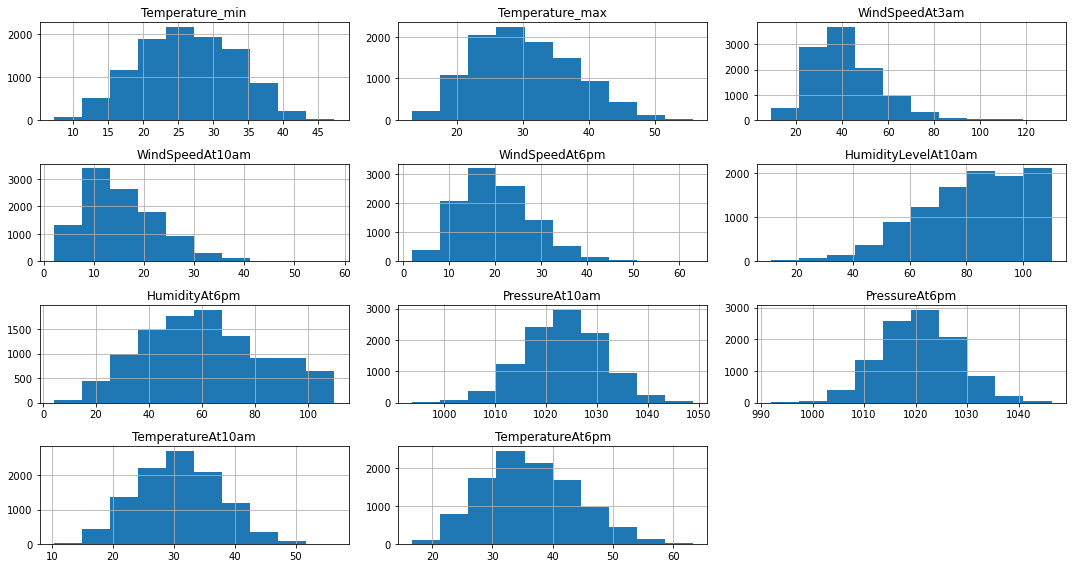

In [10]:
import seaborn as sns
df_ind.hist()
plt.tight_layout()
plt.show()

In [11]:
df_ind.skew()

Temperature_min        0.006720
Temperature_max        0.361414
WindSpeedAt3am         0.965806
WindSpeedAt10am        0.681830
WindSpeedAt6pm         0.625044
HumidityLevelAt10am   -0.636941
HumidityAt6pm          0.187420
PressureAt10am        -0.050507
PressureAt6pm          0.004457
TemperatureAt10am      0.075801
TemperatureAt6pm       0.312913
dtype: float64

In [12]:
# Column HumidityLevelAt10am is left skewed
# columns Temperature_min, 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
ss=StandardScaler()
df_ind=pd.DataFrame(ss.fit_transform(df_ind), columns=df_ind.columns)
df_ind.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
0,-0.878155,0.052541,-0.650557,-1.259210,-0.432548,1.497518,0.484111,0.243831,-0.713365,-0.609118,0.541413
1,0.539411,0.402758,-0.581288,-0.722216,-0.050237,-0.658008,-1.143217,1.225781,1.977394,-0.609118,0.398983
2,-0.410504,-0.459315,-1.204704,-0.185221,-0.050237,0.850860,0.088275,0.283640,0.712737,-0.135221,-0.209583
3,-0.118223,-0.459315,0.249933,0.620272,1.224134,-0.011350,-0.087653,-0.539075,-0.511558,-0.964541,-0.701615
4,1.050904,1.210950,-0.581288,-1.527708,-1.069733,0.635308,-0.527471,0.522493,0.201493,0.427532,0.955756


In [14]:
df_ind.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04,1.046400e+04
mean,-2.273390e-16,-2.456517e-16,3.367379e-16,2.559062e-16,-1.219160e-16,-2.030263e-16,-1.705347e-16,6.093049e-15,1.388889e-14,-1.218375e-15,-1.178339e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-2.792600e+00,-2.304688e+00,-2.243731e+00,-1.796205e+00,-2.344104e+00,-3.837410e+00,-2.506655e+00,-3.936091e+00,-3.875007e+00,-3.023033e+00,-2.527313e+00
25%,-7.320143e-01,-7.691218e-01,-7.198251e-01,-7.222155e-01,-6.874221e-01,-6.580082e-01,-7.473805e-01,-6.585011e-01,-6.864573e-01,-7.275928e-01,-7.275116e-01
50%,-1.592410e-02,-1.090978e-01,-1.656776e-01,-1.852206e-01,-5.023680e-02,1.503142e-01,-8.765267e-02,4.978634e-03,-3.137162e-04,1.287180e-02,-8.010098e-02
75%,7.586224e-01,7.125648e-01,5.270068e-01,6.202717e-01,5.869485e-01,8.508603e-01,7.040207e-01,6.949976e-01,6.723760e-01,6.940992e-01,6.708954e-01
max,3.067648e+00,3.433480e+00,6.207019e+00,5.721723e+00,5.429557e+00,1.497518e+00,2.155422e+00,3.388725e+00,3.457312e+00,3.789241e+00,3.506554e+00


<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
cov_mat = np.cov(df_ind.T)
print(cov_mat[0:5])

[[ 1.00009557  0.62986804  0.2774717   0.19188583  0.10114221 -0.25035675
  -0.05795163 -0.3635111  -0.34036162  0.71612149  0.54811355]
 [ 0.62986804  1.00009557  0.23626203 -0.01431146  0.07161277 -0.50728072
  -0.55772371 -0.24497184 -0.29854472  0.76966307  0.8658169 ]
 [ 0.2774717   0.23626203  1.00009557  0.42037333  0.57176138 -0.27611053
  -0.11724591 -0.47841125 -0.47563157  0.27207988  0.17209019]
 [ 0.19188583 -0.01431146  0.42037333  1.00009557  0.33458778 -0.31749763
  -0.00663469 -0.25165481 -0.18433562  0.14168084 -0.0391036 ]
 [ 0.10114221  0.07161277  0.57176138  0.33458778  1.00009557 -0.19684857
  -0.15049059 -0.33940416 -0.30875067  0.10542863  0.04909065]]


In [16]:
cov_mat.shape

(11, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.37827342 2.20537611 1.4028951  0.93909121 0.69185977 0.38762838
 0.34242384 0.24329175 0.11262274 0.13748201 0.160107  ] 

Eigenvectors: 
 
 [[ 0.33781785  0.03549082  0.35858565 -0.42444298  0.13644818  0.14320347
  -0.03924682  0.7102148   0.1131725  -0.11587593 -0.06766114]
 [ 0.40087506  0.28485778  0.10425574  0.03376955  0.1189962  -0.08118397
   0.15405941 -0.11028839 -0.82752819 -0.0604924   0.03216514]
 [ 0.26666777 -0.38120744 -0.1908883  -0.02705605  0.31592881 -0.78707893
  -0.12571969  0.05588588  0.05942134  0.04255307 -0.05314346]
 [ 0.14561644 -0.32320401 -0.33544556 -0.59156622 -0.38842204  0.06004674
   0.47855507 -0.14902074 -0.05799504 -0.04274979 -0.03114975]
 [ 0.17812567 -0.3671682  -0.34917199  0.09189247  0.61597616  0.55598391
  -0.01913024 -0.05338958 -0.03795733 -0.01323056  0.09857223]
 [-0.3093895  -0.14948994  0.44585592  0.03061406  0.38031984 -0.06731708
   0.58995926 -0.13531557  0.03534899 -0.07698165 -0.39936631]
 [-0.24976325 -0.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)
print(eig_val)

[4.37827342476177, 2.205376114285331, 1.4028950957281165, 0.9390912080234743, 0.6918597738714433, 0.38762837994450317, 0.34242383692492656, 0.2432917452762679, 0.1601069974600569, 0.137482005810032, 0.11262274162621201]


**Intrepretation**- Here the first Three eigenvalues are greater than 1. Thus we can consider 3 principal components using kaiser criterion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
percent_var = []
for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)
percent_var

[39.79868192528703,
 20.04695778058748,
 12.752372972792672,
 8.536376936987079,
 6.289033234307155,
 3.5235575995268062,
 3.1126464812217693,
 2.2115317719849785,
 1.4553790610444248,
 1.2497169749012755,
 1.023745261359341]

In [20]:
np.cumsum(percent_var)
# First three principle component are required to explain at least 80% of variation in data.

array([ 39.79868193,  59.84563971,  72.59801268,  81.13438962,
        87.42342285,  90.94698045,  94.05962693,  96.2711587 ,
        97.72653776,  98.97625474, 100.        ])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
eigenvector = eig_vec[:,[0,1,2,3]]

eigenvector

array([[ 0.33781785,  0.03549082,  0.35858565, -0.42444298],
       [ 0.40087506,  0.28485778,  0.10425574,  0.03376955],
       [ 0.26666777, -0.38120744, -0.1908883 , -0.02705605],
       [ 0.14561644, -0.32320401, -0.33544556, -0.59156622],
       [ 0.17812567, -0.3671682 , -0.34917199,  0.09189247],
       [-0.3093895 , -0.14948994,  0.44585592,  0.03061406],
       [-0.24976325, -0.30898812,  0.45624609, -0.36844966],
       [-0.27406409,  0.40143674, -0.25274467, -0.30171211],
       [-0.28205479,  0.36137641, -0.26688296, -0.38869691],
       [ 0.38706309,  0.15069408,  0.20620235, -0.26766507],
       [ 0.37221806,  0.31737997,  0.07134515,  0.09554306]])

In [22]:
df_pc=pd.DataFrame(df_ind.dot(eigenvector))
df_pc.head()

,0,1,2,3
0,-1.193577,0.344281,1.318532,1.383219
1,-0.417268,2.300435,-1.143463,-0.313206
2,-1.374390,0.522208,0.229444,-0.056650
3,-0.166105,-1.620767,-0.794714,0.358037
4,0.528825,2.208708,1.513146,0.370726


In [23]:
df_pc.rename(columns={0:'PC1', 1:'PC2', 2:'PC3', 3:'PC4'}, inplace=True)

In [24]:
df_pc.head()

,PC1,PC2,PC3,PC4
0,-1.193577,0.344281,1.318532,1.383219
1,-0.417268,2.300435,-1.143463,-0.313206
2,-1.374390,0.522208,0.229444,-0.056650
3,-0.166105,-1.620767,-0.794714,0.358037
4,0.528825,2.208708,1.513146,0.370726


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
pca = PCA(n_components = 2, random_state = 10)

components = pca.fit_transform(df_pc)

In [26]:
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2
0,-1.193577,-0.344281
1,-0.417268,-2.300435
2,-1.374390,-0.522208
3,-0.166105,1.620767
4,0.528825,-2.208708


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

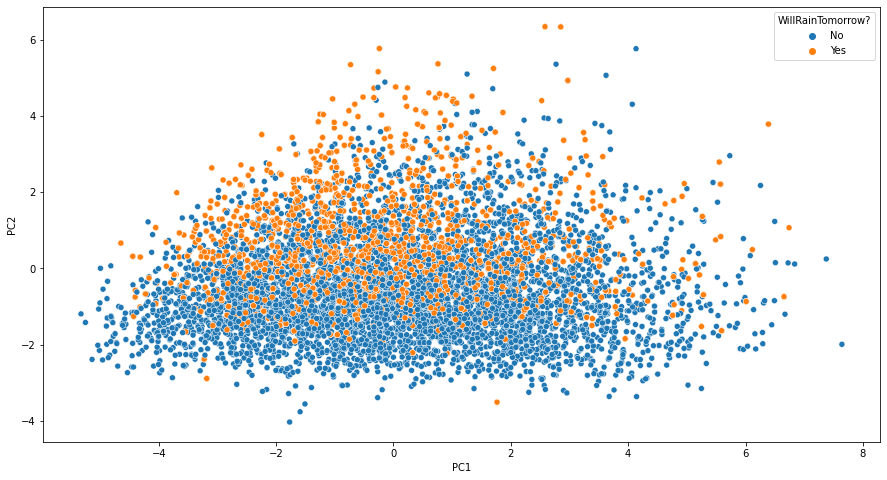

In [27]:
sns.scatterplot(df_pca_sklearn['PC1'],df_pca_sklearn['PC2'],hue=df['WillRainTomorrow?'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df.columns

Index(['Temperature_min', 'Temperature_max', 'WindSpeedAt3am',
       'WindSpeedAt10am', 'WindSpeedAt6pm', 'HumidityLevelAt10am',
       'HumidityAt6pm', 'PressureAt10am', 'PressureAt6pm', 'TemperatureAt10am',
       'TemperatureAt6pm', 'WillRainTomorrow?'],
      dtype='object')

In [29]:
df['WillRainTomorrow?']=pd.get_dummies(df['WillRainTomorrow?'], drop_first=True)

In [30]:
x=df_ind
y=df['WillRainTomorrow?']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=1)

In [31]:
print(xtrain.shape, xtest.shape ,ytrain.shape ,ytest.shape)

(7324, 11) (3140, 11) (7324,) (3140,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
pca_train = PCA(n_components = 3, random_state = 10)

components = pca_train.fit_transform(xtrain)

In [33]:
df_pca_sklearn_train = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])

df_pca_sklearn_train.head()

,PC1,PC2,PC3
0,-0.597420,-0.456384,2.419474
1,1.862283,-0.643601,1.342235
2,-0.122887,-1.834297,1.318570
3,-2.336506,-0.273967,-0.012528
4,-1.987230,0.225135,-0.426260


In [34]:
pca_test = PCA(n_components = 3, random_state = 10)

components = pca_test.fit_transform(xtest)

In [35]:
df_pca_sklearn_test = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])

df_pca_sklearn_test.head()

,PC1,PC2,PC3
0,2.142462,1.752530,-0.530078
1,3.539996,0.441630,1.180283
2,0.335797,-0.695773,1.899190
3,2.008272,-1.463620,-0.368480
4,-3.433266,1.344218,1.080056


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
from sklearn.ensemble import RandomForestClassifier
def randomforest(xtrain,xtest,ytrain,ytest):
    df_forest=RandomForestClassifier(random_state=10)
    df_forest.fit(xtrain,ytrain)
    y_pred=df_forest.predict(xtest)
    
    print('accuracy of the test:')
    
    print(accuracy_score(ytest,y_pred))

In [37]:
randomforest(xtrain, xtest, ytrain, ytest)

accuracy of the test:
0.9442675159235668


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
%%time

randomforest(xtrain, xtest, ytrain, ytest)

accuracy of the test:
0.9442675159235668
Wall time: 714 ms


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
%%time
randomforest(df_pca_sklearn_train,df_pca_sklearn_test,ytrain,ytest)

accuracy of the test:
0.8356687898089172
Wall time: 509 ms


<a id="lda"> </a>
## 3. Linear Discriminant Analysis (LDA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Project the train and test sets (data without PCA transformation) onto the 1-dimensional vector that maximizes the separation between the classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(xtrain, ytrain)
X_test_lda = lda.transform(xtest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Run the random forest classifier on the LDA transformed data and find the model accuracy on the test set. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
%%time
randomforest(X_train_lda,X_test_lda,ytrain,ytest)

accuracy of the test:
0.9124203821656051
Wall time: 521 ms


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Which of the above methods is more efficient in reducing the dimension of the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
#Both LDA and PCA takes almost same time to execute but the accuracy of PCA>LDA.